# Finding outliers
- outlier detection:
    The training data contains outliers which are defined as observations that are far from the others. Outlier detection estimators thus try to fit the regions where the training data is the most concentrated, ignoring the deviant observations.
    
- novelty detection:
    The training data is not polluted by outliers and we are interested in detecting whether a new observation is an outlier. In this context an outlier is also called a novelty.
    
Outlier detection and novelty detection are both used for __anomaly detection__, where one is interested in detecting abnormal or unusual observations.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action = "ignore")
df = pd.read_csv(r"C:\Users\Vaibhav\Desktop\BA\Datasets\boston.csv")

In [2]:
df.head(3)

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

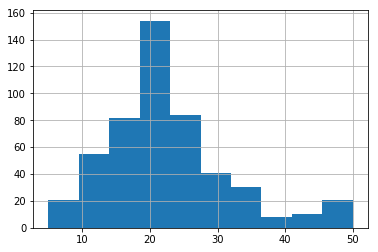

In [4]:
df.MEDV.hist()

In [6]:
def standarddev(s, threshold):
    mu = s.mean()
    st = s.std()
    lower_cutoff = mu - threshold*st
    upper_cutoff = mu + threshold*st
    outlier_indices = np.where(np.logical_or(s<lower_cutoff, s>upper_cutoff))
    val_b4_imputation = s[np.logical_or(s<lower_cutoff, s>upper_cutoff)]
    s[s<lower_cutoff] = lower_cutoff
    s[s>upper_cutoff] = upper_cutoff
    return lower_cutoff, upper_cutoff, outlier_indices, val_b4_imputation,s

In [7]:
l,u,out_indices, val_b4_imputation, s = standarddev(df.MEDV, 2.8)

In [8]:
print(l, u, val_b4_imputation)

-2.8183407035017183 47.77252749246111 161    48.284698
162    48.284698
163    48.284698
166    48.284698
186    48.284698
195    48.284698
203    48.284698
204    48.284698
225    48.284698
233    48.284698
257    48.284698
262    48.284698
267    48.284698
283    48.284698
368    48.284698
369    48.284698
370    48.284698
371    48.284698
372    48.284698
Name: MEDV, dtype: float64


In [9]:
print("Values after imputation: ")
s.iloc[out_indices]

Values after imputation: 


161    47.772527
162    47.772527
163    47.772527
166    47.772527
186    47.772527
195    47.772527
203    47.772527
204    47.772527
225    47.772527
233    47.772527
257    47.772527
262    47.772527
267    47.772527
283    47.772527
368    47.772527
369    47.772527
370    47.772527
371    47.772527
372    47.772527
Name: MEDV, dtype: float64

In [10]:
df.MEDV=s

----

### IQR Method

{'whiskers': [<matplotlib.lines.Line2D at 0x1deafa42b70>,
 'caps': [<matplotlib.lines.Line2D at 0x1deafa4d240>,
 'boxes': [<matplotlib.lines.Line2D at 0x1deafa42a20>],
 'medians': [<matplotlib.lines.Line2D at 0x1deafa4d8d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1deafa4dc18>],
 'means': []}

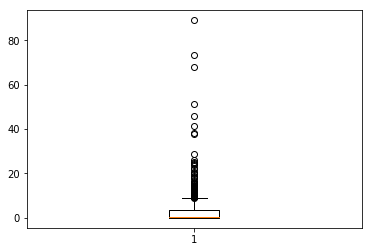

In [11]:
s = df.CRIM
plt.boxplot(s)

In [13]:
def out_iqr(s):
    q1 = np.percentile(a = s, q = 25)
    q3 = np.percentile(a = s, q = 75)
    iqr = q3-q1
    low_cutoff = q1-1.5*iqr
    upper_cutoff = q3+1.5*iqr
    out_indices = np.where(np.logical_or(s<low_cutoff, s>upper_cutoff))
    s[s<low_cutoff]=low_cutoff
    s[s>upper_cutoff] = upper_cutoff
    return low_cutoff, upper_cutoff, out_indices,s
    

In [14]:
l,u, indices, s = out_iqr(df.CRIM)

In [15]:
l,u

(-5.31051125, 9.06963875)

In [16]:
indices

(array([367, 371, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 384,
        385, 386, 387, 388, 392, 394, 398, 399, 400, 401, 402, 403, 404,
        405, 406, 407, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418,
        419, 420, 422, 425, 426, 427, 429, 431, 434, 435, 436, 437, 438,
        439, 440, 441, 443, 444, 445, 447, 448, 454, 468, 469, 477, 478,
        479], dtype=int64),)

In [17]:
#After imputation
df.CRIM[indices[0]]

367    9.069639
371    9.069639
373    9.069639
374    9.069639
375    9.069639
376    9.069639
377    9.069639
378    9.069639
379    9.069639
380    9.069639
381    9.069639
382    9.069639
384    9.069639
385    9.069639
386    9.069639
387    9.069639
388    9.069639
392    9.069639
394    9.069639
398    9.069639
399    9.069639
400    9.069639
401    9.069639
402    9.069639
403    9.069639
404    9.069639
405    9.069639
406    9.069639
407    9.069639
409    9.069639
         ...   
416    9.069639
417    9.069639
418    9.069639
419    9.069639
420    9.069639
422    9.069639
425    9.069639
426    9.069639
427    9.069639
429    9.069639
431    9.069639
434    9.069639
435    9.069639
436    9.069639
437    9.069639
438    9.069639
439    9.069639
440    9.069639
441    9.069639
443    9.069639
444    9.069639
445    9.069639
447    9.069639
448    9.069639
454    9.069639
468    9.069639
469    9.069639
477    9.069639
478    9.069639
479    9.069639
Name: CRIM, Length: 66, 